In [4]:
!pip install tensorflow==2.0 --ignore-installed
!pip install keras

    100% |████████████████████████████████| 102.7MB 97kB/s eta 0:00:01    32% |██████████▎                     | 32.9MB 126kB/s eta 0:09:14    53% |█████████████████               | 54.7MB 186kB/s eta 0:04:18    65% |████████████████████▉           | 67.0MB 201kB/s eta 0:02:58    73% |███████████████████████▍        | 75.0MB 140kB/s eta 0:03:17    92% |█████████████████████████████▋  | 95.2MB 78kB/s eta 0:01:36    97% |███████████████████████████████▎| 100.5MB 53kB/s eta 0:00:42    99% |███████████████████████████████▊| 101.9MB 115kB/s eta 0:00:07
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/six/
    100% |████████████████████████████████| 450kB 137kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/df/f1/98449d2c173c6324220ab1672203ad09ac7345f023dc62eb0786ad2a0df6/grpcio-1.26.0-cp37-cp37m-maco

  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
spyder 3.3.2 requires pyqt5<5.10; python_version >= "3", which is not installed.


In [19]:
!pip install opencv-python

    100% |████████████████████████████████| 45.2MB 98kB/s eta 0:00:011


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('trainLabels.csv')

In [4]:
df_train.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

In [5]:
df_train.tail()

,image,level
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0
35125,44349_right,1


In [6]:
targets_series = pd.Series(df_train['level'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [7]:
targets_series[:10]

0    0
1    0
2    0
3    0
4    1
5    2
6    4
7    4
8    0
9    1
Name: level, dtype: int64

In [8]:
one_hot[:10]

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


In [9]:
one_hot_labels = np.asarray(one_hot)
one_hot_labelsY = np.asarray(targets_series)
one_hot_labelsY[:10]

array([0, 0, 0, 0, 1, 2, 4, 4, 0, 1])

In [10]:
im_size1 = 786
im_size2 = 786
x_train = []
y_train = []

In [11]:
df_test = df_train[:200]

In [12]:
print(len(df_test.values))

200


In [13]:
i=0
for f, breed in tqdm(df_test.values):
    try:
        img = image.load_img(('/Users/koundinya/Desktop/total/{}.jpeg'.format(f)), target_size=(786, 786))
        arr = image.img_to_array(img)
        label = one_hot_labelsY[i]
        x_train.append(arr)
        y_train.append(label)
        i += 1 
    except:
        pass

100%|██████████| 200/200 [00:03<00:00, 50.60it/s]


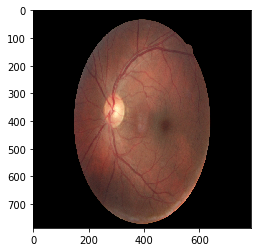

In [14]:
plt.imshow(x_train[22]/255)
plt.show()

In [15]:
x_valid = []
y_valid = []

In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [17]:
visible = Input(shape=(786,786,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(5, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [28]:
""""""
#model = keras.Sequential([ keras.layers.Flatten(input_shape=(786, 786, 3)),
 #                         keras.layers.Dense(128, activation=tf.nn.relu),
  #                        keras.layers.Dense(10, activation=tf.nn.softmax) ])
""""""                         

''

In [19]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:

y_train_raw = np.array(Y_train)
x_train_raw = np.array(X_train)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 786, 786, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 783, 783, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 391, 391, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 388, 388, 16)      8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 194, 194, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 602176)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6021

In [22]:

model.fit(x_train_raw, y_train_raw, epochs=5)


Epoch 1/5
25/25 [==============================] - 30s 1s/step - loss: 5.3264 - accuracy: 0.2000
Epoch 2/5
25/25 [==============================] - 23s 920ms/step - loss: 3.9168 - accuracy: 0.7200
Epoch 3/5
25/25 [==============================] - 24s 957ms/step - loss: 3.9168 - accuracy: 0.7200
Epoch 4/5
25/25 [==============================] - 27s 1s/step - loss: 3.9168 - accuracy: 0.7200
Epoch 5/5
25/25 [==============================] - 35s 1s/step - loss: 3.9168 - accuracy: 0.7200


In [23]:
x_valid_raw = np.array(X_valid)

In [24]:

y_valid_raw = np.array(Y_valid)

In [25]:
test_loss, test_acc = model.evaluate(x_valid_raw, y_valid_raw)

3/3 [==============================] - 0s 147ms/step


In [26]:
test_loss

0.6931471824645996

In [27]:
test_acc

1.0